# Лабораторная работа №5. Визуализация данных

In [2]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Matplotlib version: {mpl.__version__}")

%matplotlib inline

Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Numpy version: 1.26.4
Matplotlib version: 3.8.0


Задача **1**

Постройте два линейных графика функции $y=\frac{2}{x}+3$ на одной оси координат, первый для диапазона x=[-10;0], а второй для x=[0;7].

* Графики должны быть помещены на оси с пределами xlim(-10, 10) и ylim(-10, 10), иметь подписи к осям, легенду и заголовок.
* Первый график должен быть красного цвета и нарисован штрихпунктирной линией
* Второй график должен иметь цвет (1.0,0.2,0.3) и нарисован сплошной линией


Text(0, 0.5, 'y')

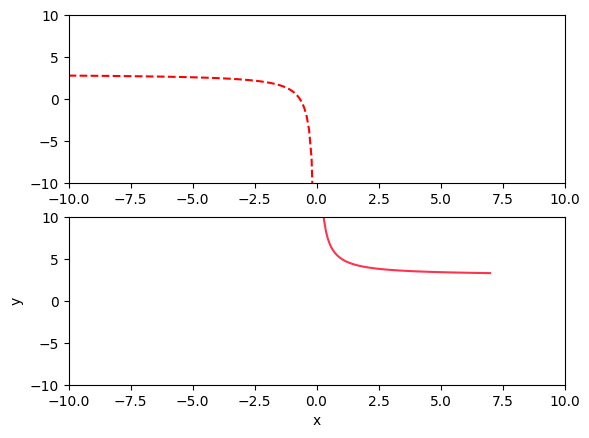

In [6]:
# Ваш код здесь
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def func(x):
  return 2 / x + 3

x1 = np.linspace(-10, 0, 100, endpoint=False)
x2 = np.linspace(0.1, 7, 100)
fig, ax = plt.subplots(2)
ax[0].plot(x1, func(x1), 'r--', label='График для x=[-10;0)')
ax[0].set_xlim(-10, 10)
ax[0].set_ylim(-10, 10)

ax[1].plot(x2, func(x2), color=(1.0,0.2,0.3), label='График для x=[0;7]')
ax[1].set_xlim(-10, 10)
ax[1].set_ylim(-10, 10)
plt.xlabel('x')
plt.ylabel('y')

Задача **2**

Постройте диаграмму рассеяния для набора данных titanic (файл ./data/titanic.csv).

* По оси X - возврат пассажира (Age)
* По оси Y - стоимость билета (Fare)
* Для выживших пассажиров используется маркер зеленый круг (Survived)
* Для не выживших пассажиров используется маркер красный крест (Survived)
* График должен подписи к осям и легенду и заголовок

Данные для которых не указан возврат или стоимость билета должны быть исключены

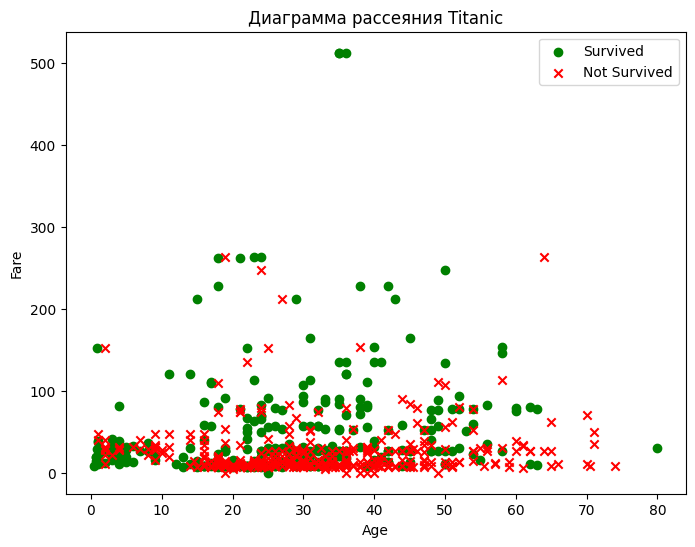

In [14]:
# Ваш код здесь
titanic = pd.read_csv('titanic.csv')
titanic = titanic.dropna(subset=['Age', 'Fare'])
plt.figure(figsize=(8, 6))
plt.scatter(titanic[titanic['Survived'] == 1]['Age'],
            titanic[titanic['Survived'] == 1]['Fare'],
            color='green', marker='o', label='Survived')
plt.scatter(titanic[titanic['Survived'] == 0]['Age'],
            titanic[titanic['Survived'] == 0]['Fare'],
            color='red', marker='x', label='Not Survived')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Диаграмма рассеяния Titanic')
plt.legend()

plt.show()

Задача **3**

Для первоначального анализа данных часто используются диаграммы рассеяния для всех признаков из набора данных. Это позволяет визуально увидеть зависимости между признаками и выбросы.
Для набора данных [iris](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0) постройте на одном холсте 16 диаграмм рассеяния показывающих зависимости между всеми признаками набора ('sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)')

* Холст должен содержать 16 графиков на отдельных осях (см. иллюстрацию к статье в Википедия)
* Цвет маркеров должен зависеть от вида ирисов (iris.target)
* Графики должны иметь подписи к осям, легенду и общий заголовок

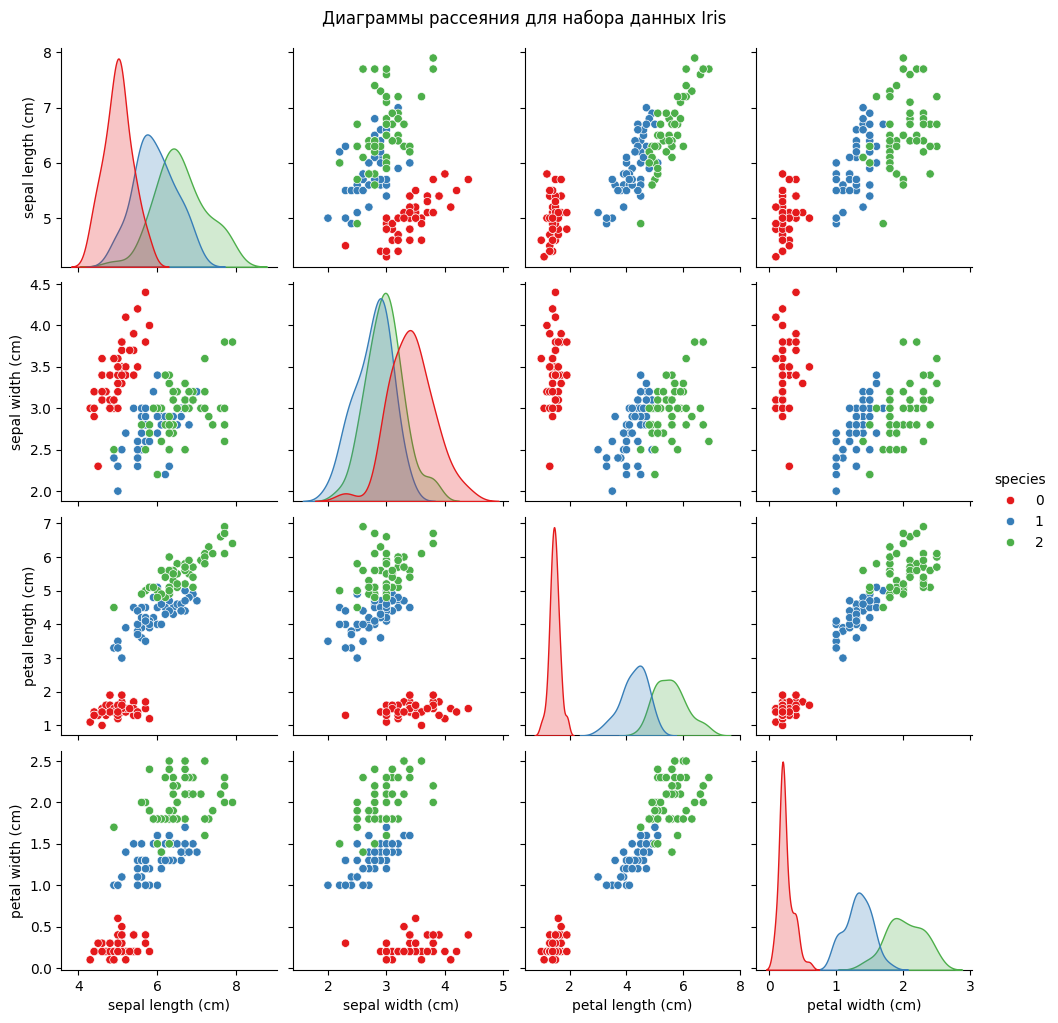

In [18]:
from sklearn.datasets import load_iris
iris = load_iris()

# Ваш код здесь
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
sns.pairplot(df, hue='species', palette='Set1')
plt.suptitle('Диаграммы рассеяния для набора данных Iris', y=1.02)
plt.show()

Задача **4**

Постройте на одном холсте и разный осях следующие распределения для набора данных titanic (./data/titanic.csv):

* Постройте гистограмму распределения пассажиров по возрасту (Age). Интервал 5 лет.
* Постройте гистограмму распределения пассажиров женского пола по стоимости билетов (Fare). Подберите удобный интервал
* График должен иметь подписи к осям, легенду и заголовок

Данные для которых не указан возраст или стоимость билета должны быть исключены

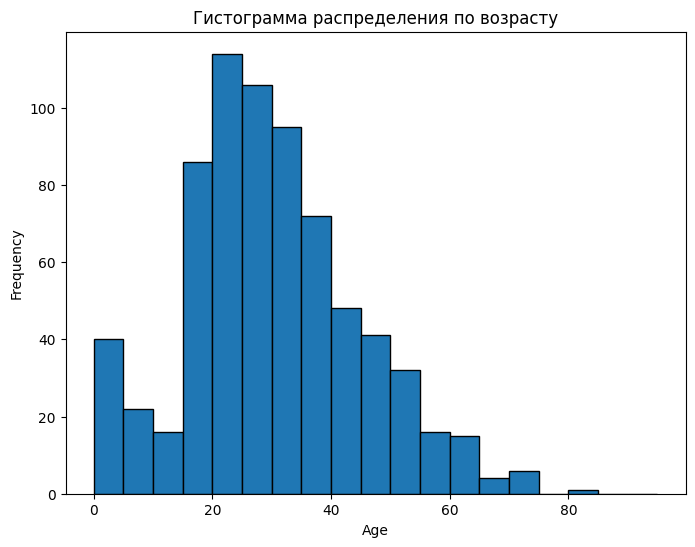

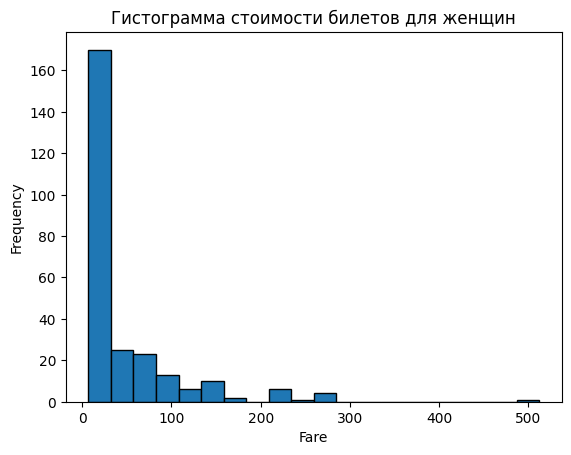

In [23]:
# Ваш код здесь
plt.figure(figsize=(8, 6))
plt.hist(titanic['Age'], bins=np.arange(0, 100, 5), edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Гистограмма распределения по возрасту')
plt.show()
female_titanic = titanic[titanic['Sex'] == 'female']
plt.hist(female_titanic['Fare'], bins=20, edgecolor='black')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Гистограмма стоимости билетов для женщин')
plt.show()

Задача **5**

Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму:

* Диаграмма должна быть вертикальной
* По оси X - класс каюты пассажира (Pclass)
* По оси Y - средняя стоимость за проезд для данного класса (Fare)
* График должен иметь подписи к осям, легенду и заголовок

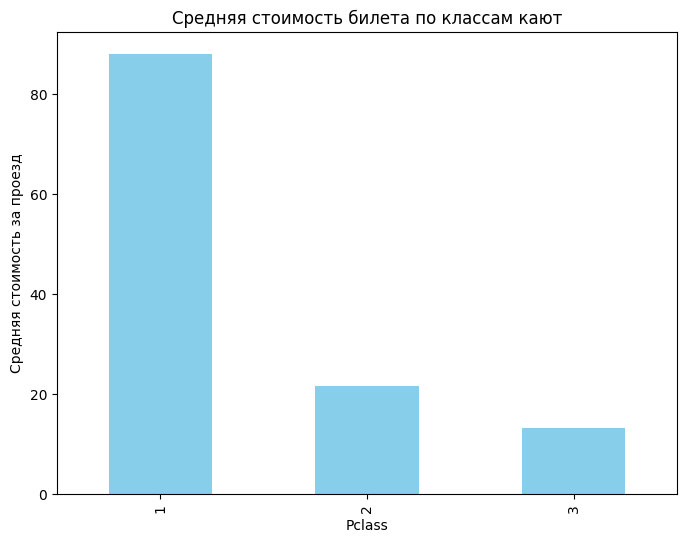

In [25]:
# Ваш код здесь
avg_fare_by_class = titanic.groupby('Pclass')['Fare'].mean()
plt.figure(figsize=(8, 6))
avg_fare_by_class.plot(kind='bar', color='skyblue')
plt.xlabel('Pclass')
plt.ylabel('Средняя стоимость за проезд')
plt.title('Средняя стоимость билета по классам кают')
plt.show()

Задача **6**

Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму c накоплением:

* Диаграмма должна быть вертикальной
* По оси X - класс каюты пассажира (Pclass)
* По оси Y - количество пассажиров с разбивкой по полу (Sex)
* График должен иметь подписи к осям, легенду и заголовок

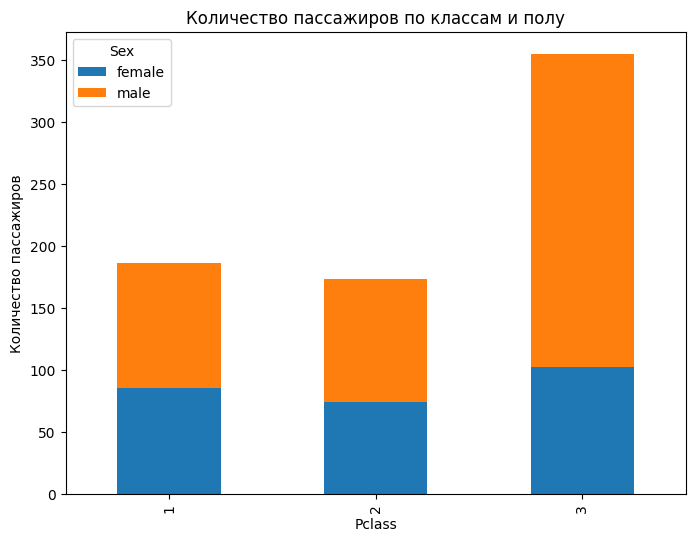

In [28]:
# Ваш код здесь
count_by_class_sex = pd.crosstab(titanic['Pclass'], titanic['Sex'])
count_by_class_sex.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel('Pclass')
plt.ylabel('Количество пассажиров')
plt.title('Количество пассажиров по классам и полу')
plt.show()

Задача **7**

Для набора данных iris постройте круговую диаграмму

* Диаграмма должна иметь 3 сектора отражающих долю ирисов данного вида в наборе
* Сектор с максимальной долей долен быть выдвинут
* График должен иметь подписи к осям, легенду и заголовок

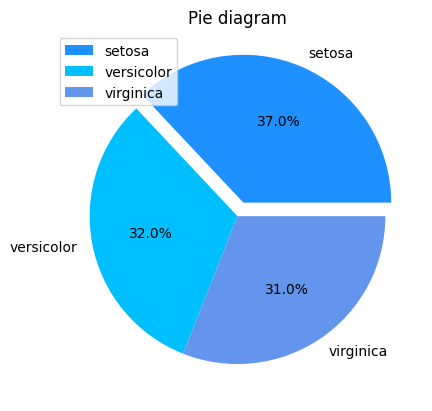

In [31]:
from sklearn.datasets import load_iris
iris = load_iris()


# Ваш код здесь
target_series = pd.Series(iris.target)
freq_table = target_series.sample(100, random_state = 42).value_counts()
plt.pie(
    freq_table,
    labels=[iris.target_names[i] for i in freq_table.index],
    colors=["dodgerblue", "deepskyblue", "cornflowerblue"],
    autopct="%.1f%%",
    explode=[0.1, 0, 0]
    )
plt.title("Pie diagram")
plt.legend()
plt.show()

Задача **8**

Использую библиотеку [Seaborn](https://seaborn.pydata.org/) постройте гистограмму для возраста пассажиров "Титаника"

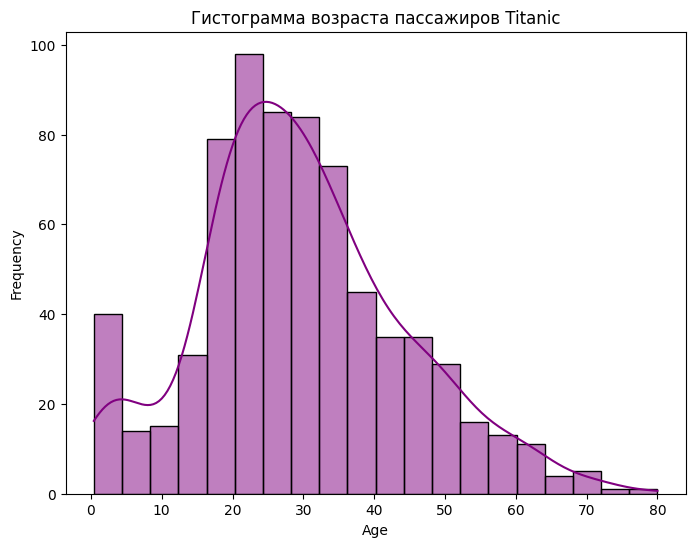

In [33]:
# Ваш код здесь
plt.figure(figsize=(8, 6))
sns.histplot(titanic['Age'], bins=20, kde=True, color='purple')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Гистограмма возраста пассажиров Titanic')
plt.show()

## Вопросы


1.Диаграмма рассеяния используется для отображения зависимости между двумя переменными и показывает распределение точек в координатной плоскости.

2.Гистограмма используется для отображения частоты появления различных значений, в то время как столбчатая диаграмма используется для сравнения значений различных категорий.

3.Цвет линии в линейном графике Matplotlib можно задать с помощью параметра 'color' при вызове функции построения графика.

4.Класс plt.Figure представляет собой всю фигуру, включая один или несколько графиков, в то время как объект plt.Axes представляет собой конкретные оси или график на этой фигуре.

5.Нет, Matplotlib позволяет управлять типом маркера для scatter графика с помощью параметра 'marker'.

6.Нет, помимо Matplotlib существует множество других библиотек для построения графиков в Python, таких как Seaborn, Plotly, Bokeh и др.

7.Нет, Matplotlib позволяет сохранить график в виде файла различных форматов с помощью функции savefig().

8.Да, в наборе данных iris представлены 4 вида ирисов: setosa, versicolor, virginica.

9.Нет, для некоторых пассажиров "Титаника" возраст не указан в исходных данных.

10.Нет, на одном холсте Matplotlib можно разместить гораздо больше 16 диаграмм, и их размер и размещение можно регулировать.